## Installation

Pour charger tous les modules utiles, il suffit d'exécuter la commande suivante à la racine du répertoire :

```sh
pip install -r requirements.txt
```

## L'objet Model

L'objet central de ce code est l'objet `Model` défini dans `model.py`. La première création peut prendre du temps pour télécharger la base et pour la calibrer. Lorsque la base a été téléchargée, alors elle est enregistrée. De même, lorsqu'une calibration est effectuée, l'objet obtenu est également enregistré.

La première fois, cette étape peut durer une dizaine de minutes, et nécessite de la RAM. Les fois suivantes, cette étape dure moins de 5 secondes.

Les paramètres de la classe `Model` sont l'année de la base à utiliser, le système (produit = pxp, industrie = ixi) et la matrice d'aggrégation à utiliser (il s'agit de donner le nom de l'un des fichiers Excel du dossier `data/aggregation`, sans l'extension). Les paramètres supplémentaires sont `calib` (pour forcer la recalibration de la base), et deux dictionnaires `regions_mapper` et `sectors_mapper` qui permettent de réaggréger respectivement les régions et les secteurs pour l'affichage des figures (des exemples sont donnés dans le fichier `settings.py`).

In [1]:
from main import Model

reference = Model(2015, "pxp", "opti_S")

Les objets `Model` disposent de plusieurs méthodes et attributs utiles documentés dans le fichier `model.py`. Voici ci-dessous quelques exemples.

In [2]:
print(reference.regions)
print(reference.base_year)
print(reference.summary_long)

['FR', 'UK, Norway, Switzerland', 'United States', 'Asia, Row Europe', 'China, RoW Asia and Pacific', 'RoW America,Turkey, Taïwan', 'RoW Middle East, Australia', 'Brazil, Mexico', 'South Africa', 'Japan, Indonesia, RoW Africa', 'EU']
2015
2015__pxp__opti_S


Parmi ces attributs, le principal est `iot` qui est en fait le modèle MRIO fourni par `pymrio`. Il s'agit exactement d'un objet `pymrio.IOSystem`, il s'utilise donc comme tel. Il dispose d'un compte satellite `ghg_emissions_desag` qui contient les informations relatives aux émissions de gaz à effet de serre, structuré selon la nomenclature standard de la librairie `pymrio`.

In [3]:
reference.iot.Z

region                                FR                                    \
sector                       Agriculture Crude coal  Crude oil Natural gas   
region sector                                                                
FR     Agriculture           9612.916532   0.000466   0.000000   10.946491   
       Crude coal               0.283690   0.116246   0.000000   24.944498   
       Crude oil                5.079333   0.000000   0.257807    0.291659   
       Natural gas            161.664021   0.001535   0.144921    0.189853   
       Extractive industry     87.941587   0.000000   0.000000    0.684775   
...                                  ...        ...        ...         ...   
EU     Electronics              0.113096   0.000810   0.000000    2.796869   
       Fossil fuels           115.011388   0.080352   0.834473   49.111897   
       Electricity and heat     0.007660   0.000319   0.000469    0.000561   
       Transport services     132.278347   0.056424   0.021619   53.851979   
       Composite              475.991996  38.520046  97.699233  209.750677   

region                                                                        \
sector                      Extractive industry Biomass_industry    Clothing   
region sector                                                                  
FR     Agriculture                     0.000010     31812.379994   74.000029   
       Crude coal                      0.000011         0.313180    2.829041   
       Crude oil                       0.000000         0.000620   12.489656   
       Natural gas                    57.612609       881.154910   76.459221   
       Extractive industry           155.367018       293.613351   12.485945   
...                                         ...              ...         ...   
EU     Electronics                    13.306621        46.963355    8.384844   
       Fossil fuels                    3.546265       119.218772    1.887327   
       Electricity and heat            0.002037         0.023993    0.001850   
       Transport services              7.824258       333.579315   14.315493   
       Composite                      92.715654      1701.237010  352.278475   

region                                                                ...  \
sector                      Heavy_industry Construction   Automobile  ...   
region sector                                                         ...   
FR     Agriculture               55.639191  1004.408229     1.889320  ...   
       Crude coal                60.060673     0.227038     1.857412  ...   
       Crude oil                 16.479564     0.000681     7.503530  ...   
       Natural gas             1519.997300   489.905403    79.819338  ...   
       Extractive industry     3458.197605  2880.162697     8.940784  ...   
...                                    ...          ...          ...  ...   
EU     Electronics               81.819615   155.720832   214.135020  ...   
       Fossil fuels             518.411279   217.429746    22.427990  ...   
       Electricity and heat       0.038605     0.009306     0.005025  ...   
       Transport services       293.665666   272.161561    92.378064  ...   
       Composite               2817.717360  4945.868816  2073.742475  ...   

region                                  EU                                \
sector                      Heavy_industry   Construction     Automobile   
region sector                                                              
FR     Agriculture               53.358565      14.296288       0.606619   
       Crude coal                 0.881287       0.079266       0.001404   
       Crude oil                  0.090384       0.009742       0.000003   
       Natural gas              109.463462       8.765636       1.955523   
       Extractive industry      171.744829      24.896311       2.722475   
...                                    ...            ...            ...   
EU     Electronics     

In [4]:
reference.iot.ghg_emissions_desag.S

region              FR                                            \
sector     Agriculture    Crude coal     Crude oil   Natural gas   
stressor                                                           
CO2       1.376280e-04  1.605084e-03  1.677307e-04  2.996256e-04   
CH4       5.825157e-04  3.433804e-07  2.098384e-03  2.743532e-05   
N2O       3.598029e-04  1.036141e-05  2.594910e-06  1.471966e-07   
SF6       9.688285e-07  3.003983e-07  1.156648e-07  1.225291e-08   
HFC       5.172459e-05  1.608868e-05  7.006032e-06  6.288570e-07   
PFC       2.995933e-07  1.030158e-07  5.958495e-08  4.980849e-09   

region                                                                      \
sector   Extractive industry Biomass_industry      Clothing Heavy_industry   
stressor                                                                     
CO2             9.868156e-05     4.848334e-05  1.940988e-05   1.693238e-04   
CH4             2.533451e-07     1.596604e-06  2.795812e-07   8.800259e-07   
N2O             6.225010e-07     2.129545e-06  2.095807e-08   6.306138e-07   
SF6             1.210237e-05     1.732498e-07  1.588347e-08   1.373962e-07   
HFC             6.316232e-04     9.109496e-06  8.391414e-07   1.335690e-05   
PFC             3.630516e-06     5.374172e-08  4.575009e-09   5.587275e-07   

region                                ...             EU                \
sector    Construction    Automobile  ... Heavy_industry  Construction   
stressor                              ...                                
CO2       7.443812e-06  9.140403e-06  ...   2.528727e-04  8.868437e-05   
CH4       3.902280e-08  7.366802e-08  ...   9.007973e-06  5.199265e-06   
N2O       1.933447e-08  5.307689e-08  ...   6.164990e-07  6.708859e-07   
SF6       0.000000e+00  0.000000e+00  ...   8.420759e-06  4.002749e-07   
HFC       0.000000e+00  0.000000e+00  ...   9.699813e-06  5.637275e-07   
PFC       0.000000e+00  0.000000e+00  ...   8.633209e-06  2.522919e-07   

region                                                                      \
sector      Automobile Oth transport equipment     Machinery   Electronics   
stressor                                                                     
CO2       9.539195e-06            8.584217e-05  4.763559e-05  4.041293e-05   
CH4       2.604081e-07            3.027691e-07  1.371911e-06  6.951546e-07   
N2O       1.179454e-07            4.139653e-07  2.791612e-07  3.598236e-07   
SF6       8.342398e-08            8.334841e-08  2.706585e-07  1.097499e-07   
HFC       1.085091e-07            9.590722e-08  1.329089e-06  7.472209e-07   
PFC       9.000675e-09            3.005237e-08  1.974019e-07  2.302682e-07   

region                                                                        
sector    Fossil fuels Electricity and heat Transport services     Composite  
stressor                                                                      
CO2       4.095695e-04         1.725297e-03       3.952638e-04  3.661402e-05  
CH4       2.444271e-05         1.862547e-05       1.820411e-06  1.574016e-05  
N2O       4.984127e-07         1.889919e-05       2.123505e-06  3.650456e-07  
SF6       4.739545e-06         2.130603e-07       8.969282e-08  1.066697e-06  
HFC       1.590804e-05         6.512214e-07       2.617506e-07  2.297316e-06  
PFC       2.420335e-06         1.281763e-07       1.436114e-07  4.971181e-07  

[6 rows x 187 columns]

In [5]:
reference.iot.ghg_emissions_desag.D_cba

region                   FR                                       \
sector          Agriculture Crude coal     Crude oil Natural gas   
region stressor                                                    
FR     CO2         4.792903   0.013821  3.145564e-05    2.894587   
       CH4        15.810580   0.000037  3.567485e-04    0.275279   
       N2O         9.711913   0.000093  5.594268e-07    0.007760   
       SF6         0.027995   0.000003  2.608767e-08    0.000477   
       HFC         1.486500   0.000147  1.475474e-06    0.024655   
...                     ...        ...           ...         ...   
EU     CH4         2.953502   0.000277  2.380135e-05    0.041326   
       N2O         1.855628   0.000009  3.713482e-07    0.004272   
       SF6         0.087701   0.000042  2.304465e-07    0.004956   
       HFC         0.213502   0.000036  6.165836e-07    0.009078   
       PFC         0.052602   0.000003  1.382420e-07    0.004084   

region                                                                         \
sector          Extractive industry Biomass_industry  Clothing Heavy_industry   
region stressor                                                                 
FR     CO2                 0.005815         9.846822  0.391478      13.257068   
       CH4                 0.000361         9.890740  0.073495       0.628982   
       N2O                 0.000126         5.990543  0.026527       0.194162   
       SF6                 0.000480         0.036273  0.000553       0.024635   
       HFC                 0.025027         1.890336  0.027813       1.640656   
...                             ...              ...       ...            ...   
EU     CH4                 0.000330         3.212910  0.262007       0.542885   
       N2O                 0.000092         1.849941  0.066702       0.107396   
       SF6                 0.000627         0.180479  0.027038       0.167552   
       HFC                 0.002212         0.460365  0.060485       0.296144   
       PFC                 0.000838         0.129238  0.021765       0.165928   

region                                   ...             EU               \
sector          Construction Automobile  ... Heavy_industry Construction   
region stressor                          ...                               
FR     CO2         14.019221   2.451749  ...       2.126761     1.707144   
       CH4          2.531833   0.315225  ...       0.179928     0.322200   
       N2O          0.965165   0.080635  ...       0.075010     0.154542   
       SF6          0.054140   0.003621  ...       0.004350     0.003667   
       HFC          2.872949   0.194965  ...       0.273383     0.209107   
...                      ...        ...  ...            ...          ...   
EU     CH4          0.947780   0.757121  ...       7.662092    21.557725   
       N2O          0.262062   0.136955  ...       1.146511     4.034982   
       SF6          0.169240   0.131616  ...       3.201081     3.704478   
       HFC          0.338861   0.237864  ...       5.127199     8.126646   
       PFC          0.157284   0.110024  ...       3.212993     3.454813   

region                                                                    \
sector          Automobile Oth transport equipment Machinery Electronics   
region stressor                                                            
FR     CO2        1.433795                0.553845  1.885572    0.424617   
       CH4        0.180813                0.077644  0.192634    0.047051   
       N2O        0.052502                0.018374  0.064150    0.016768   
       SF6        0.002214                0.000777  0.003106    0.000585   
       HFC        0.122286                0.038644  0.172081    0.030895   
...                    ...                     ...       ...         ...   
EU     CH4        2.084770                0.674091  4.705635    1.032100   
       N2O        0.354578                0.129011  0.765355    0.189674   
       SF6 

# Les scénarios

Plusieurs scénarios sont codés dans le fichier `scenarios.py`. Pour étudier un scénario, il faut le faire tourner sur les données d'un objet `Model`. Pour cela, il suffit d'utiliser la méthode `new_counterfactual` en donnant un nom et des paramètres au scénario. À la fin du fichier `scenarios.py`, il y a un dictionnaire `DICT_SCENARIOS` qui référence ces arguments pour tous les scénarios disponibles. Il est recommandé d'utiliser ce dictionnaire pour utiliser la méthode `new_counterfactual`.

In [6]:
from main import DICT_SCENARIOS

reference.new_counterfactual("best", DICT_SCENARIOS["best"])

L'ajout de ce scénario à l'objet `Model` peut se constater grâce à la méthode `get_counterfactuals_list()`.

In [7]:
reference.get_counterfactuals_list()

['best']

Pour accéder aux données générées par ce scénario, il suffit d'accéder à l'attribut `iot` du contrefactuel créé dans l'objet `Model`. Cet attribut s'utilise de la même manière que l'attribut `iot` de l'objet `Model` : c'est également un objet `pymrio.IOSystem`.

In [8]:
reference.counterfactuals["best"].iot.Z

region                                FR                                   \
sector                       Agriculture Crude coal Crude oil Natural gas   
region sector                                                               
FR     Agriculture           9612.916532   0.000466  0.000000   10.946491   
       Crude coal               0.283690   0.116246  0.000000   24.944498   
       Crude oil                5.079333   0.000000  0.257807    0.291659   
       Natural gas            161.664021   0.001535  0.144921    0.189853   
       Extractive industry     87.941587   0.000000  0.000000    0.684775   
...                                  ...        ...       ...         ...   
EU     Electronics              0.000000   0.000000  0.000000    0.000000   
       Fossil fuels             0.000000   0.000000  0.000000    0.000000   
       Electricity and heat     0.000000   0.000000  0.000000    0.000000   
       Transport services       0.000000   0.000000  0.000000    0.000000   
       Composite                0.000000   0.000000  0.000000    0.000000   

region                                                                       \
sector                      Extractive industry Biomass_industry   Clothing   
region sector                                                                 
FR     Agriculture                     0.000010     31812.379994  74.000029   
       Crude coal                      0.000011         0.313180   2.829041   
       Crude oil                       0.000000         0.000620  12.489656   
       Natural gas                    57.612609       881.154910  76.459221   
       Extractive industry           155.367018       293.613351  12.485945   
...                                         ...              ...        ...   
EU     Electronics                     0.000000         0.000000   0.000000   
       Fossil fuels                    0.000000         0.000000   0.000000   
       Electricity and heat            0.000000         0.000000   0.000000   
       Transport services              0.000000         0.000000   0.000000   
       Composite                       0.000000         0.000000   0.000000   

region                                                              ...  \
sector                      Heavy_industry Construction Automobile  ...   
region sector                                                       ...   
FR     Agriculture               55.639191  1004.408229   1.889320  ...   
       Crude coal                60.060673     0.227038   1.857412  ...   
       Crude oil                 16.479564     0.000681   7.503530  ...   
       Natural gas             1519.997300   489.905403  79.819338  ...   
       Extractive industry     3458.197605  2880.162697   8.940784  ...   
...                                    ...          ...        ...  ...   
EU     Electronics                0.000000     0.000000   0.000000  ...   
       Fossil fuels               0.000000     0.000000   0.000000  ...   
       Electricity and heat       0.000000     0.000000   0.000000  ...   
       Transport services         0.000000     0.000000   0.000000  ...   
       Composite                  0.000000     0.000000   0.000000  ...   

region                                  EU                                \
sector                      Heavy_industry   Construction     Automobile   
region sector                                                              
FR     Agriculture               53.358565      14.296288       0.606619   
       Crude coal                 0.881287       0.079266       0.001404   
       Crude oil                  0.090384       0.009742       0.000003   
       Natural gas              109.463462       8.765636       1.955523   
       Extractive industry      171.744829      24.896311       2.722475   
...                                    ...            ...            ...   
EU     Electronics             2120.851297    3200.251161    1796.399225   
   

In [9]:
reference.counterfactuals["best"].iot.ghg_emissions_desag.S

region              FR                                            \
sector     Agriculture    Crude coal     Crude oil   Natural gas   
stressor                                                           
CO2       1.376280e-04  1.605084e-03  1.677307e-04  2.996256e-04   
CH4       5.825157e-04  3.433804e-07  2.098384e-03  2.743532e-05   
N2O       3.598029e-04  1.036141e-05  2.594910e-06  1.471966e-07   
SF6       9.688285e-07  3.003983e-07  1.156648e-07  1.225291e-08   
HFC       5.172459e-05  1.608868e-05  7.006032e-06  6.288570e-07   
PFC       2.995933e-07  1.030158e-07  5.958495e-08  4.980849e-09   

region                                                                      \
sector   Extractive industry Biomass_industry      Clothing Heavy_industry   
stressor                                                                     
CO2             9.868156e-05     4.848334e-05  1.940988e-05   1.693238e-04   
CH4             2.533451e-07     1.596604e-06  2.795812e-07   8.800259e-07   
N2O             6.225010e-07     2.129545e-06  2.095807e-08   6.306138e-07   
SF6             1.210237e-05     1.732498e-07  1.588347e-08   1.373962e-07   
HFC             6.316232e-04     9.109496e-06  8.391414e-07   1.335690e-05   
PFC             3.630516e-06     5.374172e-08  4.575009e-09   5.587275e-07   

region                                ...             EU                \
sector    Construction    Automobile  ... Heavy_industry  Construction   
stressor                              ...                                
CO2       7.443812e-06  9.140403e-06  ...   2.528727e-04  8.868437e-05   
CH4       3.902280e-08  7.366802e-08  ...   9.007973e-06  5.199265e-06   
N2O       1.933447e-08  5.307689e-08  ...   6.164990e-07  6.708859e-07   
SF6       0.000000e+00  0.000000e+00  ...   8.420759e-06  4.002749e-07   
HFC       0.000000e+00  0.000000e+00  ...   9.699813e-06  5.637275e-07   
PFC       0.000000e+00  0.000000e+00  ...   8.633209e-06  2.522919e-07   

region                                                                      \
sector      Automobile Oth transport equipment     Machinery   Electronics   
stressor                                                                     
CO2       9.539195e-06            8.584217e-05  4.763559e-05  4.041293e-05   
CH4       2.604081e-07            3.027691e-07  1.371911e-06  6.951546e-07   
N2O       1.179454e-07            4.139653e-07  2.791612e-07  3.598236e-07   
SF6       8.342398e-08            8.334841e-08  2.706585e-07  1.097499e-07   
HFC       1.085091e-07            9.590722e-08  1.329089e-06  7.472209e-07   
PFC       9.000675e-09            3.005237e-08  1.974019e-07  2.302682e-07   

region                                                                        
sector    Fossil fuels Electricity and heat Transport services     Composite  
stressor                                                                      
CO2       4.095695e-04         1.725297e-03       3.952638e-04  3.661402e-05  
CH4       2.444271e-05         1.862547e-05       1.820411e-06  1.574016e-05  
N2O       4.984127e-07         1.889919e-05       2.123505e-06  3.650456e-07  
SF6       4.739545e-06         2.130603e-07       8.969282e-08  1.066697e-06  
HFC       1.590804e-05         6.512214e-07       2.617506e-07  2.297316e-06  
PFC       2.420335e-06         1.281763e-07       1.436114e-07  4.971181e-07  

[6 rows x 187 columns]

In [10]:
reference.counterfactuals["best"].iot.ghg_emissions_desag.D_cba

region                   FR                                          \
sector          Agriculture    Crude coal     Crude oil Natural gas   
region stressor                                                       
FR     CO2         4.782257  1.382053e-02  3.137926e-05    2.894406   
       CH4        15.799205  3.722880e-05  3.567475e-04    0.275176   
       N2O         9.705018  9.275586e-05  5.480045e-07    0.007672   
       SF6         0.027961  2.818798e-06  2.599401e-08    0.000477   
       HFC         1.484620  1.474067e-04  1.470132e-06    0.024697   
...                     ...           ...           ...         ...   
EU     CH4         0.016564  1.117334e-05  1.407517e-06    0.005163   
       N2O         0.004834  2.210602e-06  2.064270e-07    0.000974   
       SF6         0.002164  1.381114e-06  1.383533e-07    0.000929   
       HFC         0.004396  2.699013e-06  2.949547e-07    0.001817   
       PFC         0.001881  9.743968e-07  1.133371e-07    0.000856   

region                                                                         \
sector          Extractive industry Biomass_industry  Clothing Heavy_industry   
region stressor                                                                 
FR     CO2                 0.005820         9.810871  0.392124      13.246200   
       CH4                 0.000371         9.836375  0.072226       0.625741   
       N2O                 0.000132         5.957173  0.025684       0.192070   
       SF6                 0.000480         0.036158  0.000555       0.024633   
       HFC                 0.025028         1.884159  0.027964       1.640428   
...                             ...              ...       ...            ...   
EU     CH4                 0.000111         0.267793  0.229610       0.095291   
       N2O                 0.000051         0.126235  0.056039       0.022351   
       SF6                 0.000011         0.021397  0.024136       0.021204   
       HFC                 0.000025         0.049146  0.053759       0.041174   
       PFC                 0.000009         0.017506  0.019427       0.020201   

region                                   ...             EU               \
sector          Construction Automobile  ... Heavy_industry Construction   
region stressor                          ...                               
FR     CO2         14.000846   2.372903  ...       2.165128     1.740491   
       CH4          2.525257   0.305186  ...       0.185028     0.330370   
       N2O          0.960906   0.076778  ...       0.077428     0.158923   
       SF6          0.054116   0.003504  ...       0.004432     0.003738   
       HFC          2.871482   0.188326  ...       0.278272     0.213197   
...                      ...        ...  ...            ...          ...   
EU     CH4          0.138197   0.153553  ...       7.925178    21.913428   
       N2O          0.037204   0.032580  ...       1.200117     4.152902   
       SF6          0.022724   0.030492  ...       3.255136     3.747378   
       HFC          0.044800   0.056371  ...       5.250762     8.224635   
       PFC          0.020612   0.027690  ...       3.264805     3.492669   

region                                                                    \
sector          Automobile Oth transport equipment Machinery Electronics   
region stressor                                                            
FR     CO2        1.464448                0.560671  1.917199    0.434402   
       CH4        0.184295                0.078483  0.196406    0.048479   
       N2O        0.053672                0.018722  0.065768    0.017358   
       SF6        0.002263                0.000789  0.003162    0.000601   
       HFC        0.125108                0.039339  0.175359    0.031765   
...                    ...                     ...       ...         ...   
EU     CH4        2.182073                0.708905  4.895611    1.080905   
       N2O        0.368957                0.1

Pour charger tous les scénarios disponibles, l'utilisateur peut utiliser la méthode `create_counterfactuals_from_dict` avec `DICT_SCNEARIOS` en argument. Cette méthode écrase les scénarios éventuellement déjà chargés (ici par exemple, le scénario `best`).

In [11]:
reference.create_counterfactuals_from_dict(DICT_SCENARIOS)

New counterfactual created : best
New counterfactual created : worst
New counterfactual created : pref_eu
New counterfactual created : tradewar_china
Available counterfactuals : ['best', 'worst', 'pref_eu', 'tradewar_china']


Dans de nombreuses fonctions dans ce code, on retrouvera deux arguments particuliers :

- L'argument `reloc` est généralement faux par défaut. S'il est vrai, alors on considérera que la relocalisation est autorisée, c'est-à-dire que la France peut rediriger une partie ou l'intégralité de ses exportations pour son autoconsommation.
- L'argument `verbose` est généralement vrai par défaut. S'il est faux, alors le programme ne renverra pas de messages d'information sur son avancement dans le terminal.

Pour enregistrer un modèle sur lequel des contrefactuels ont été calculés, il suffit d'utiliser la méthode `save`.

In [12]:
reference.save()

Dès lors, pour retravailler sur ce même modèle, il suffira d'utiliser la fonction `load_model` du fichier `main.py` en spécifiant les paramètres.

In [13]:
from main import load_model

reference_2 = load_model(2015, "pxp", "opti_S")

## Figures

L'objet `Model` dispose de plusieurs méthodes permettant de réaliser des figures.

La méthode `plot_carbon_footprint` permet de tracer des figures permettant de mieux comprendre la composition de l'empreinte carbone d'une région donnée.

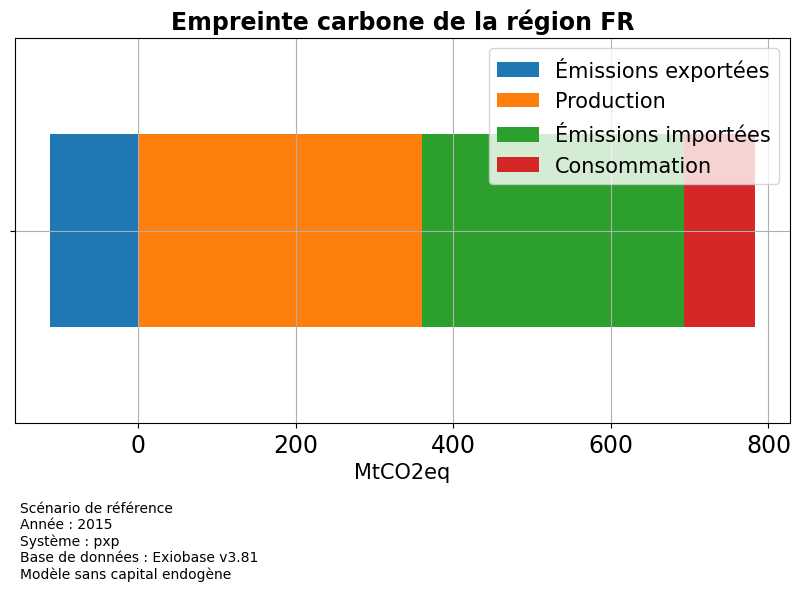

In [14]:
reference.plot_carbon_footprint()

La méthode `ghg_content_heatmap` permet d'avoir une vision globale de l'intensité carbone des différents secteurs dans chaque région.

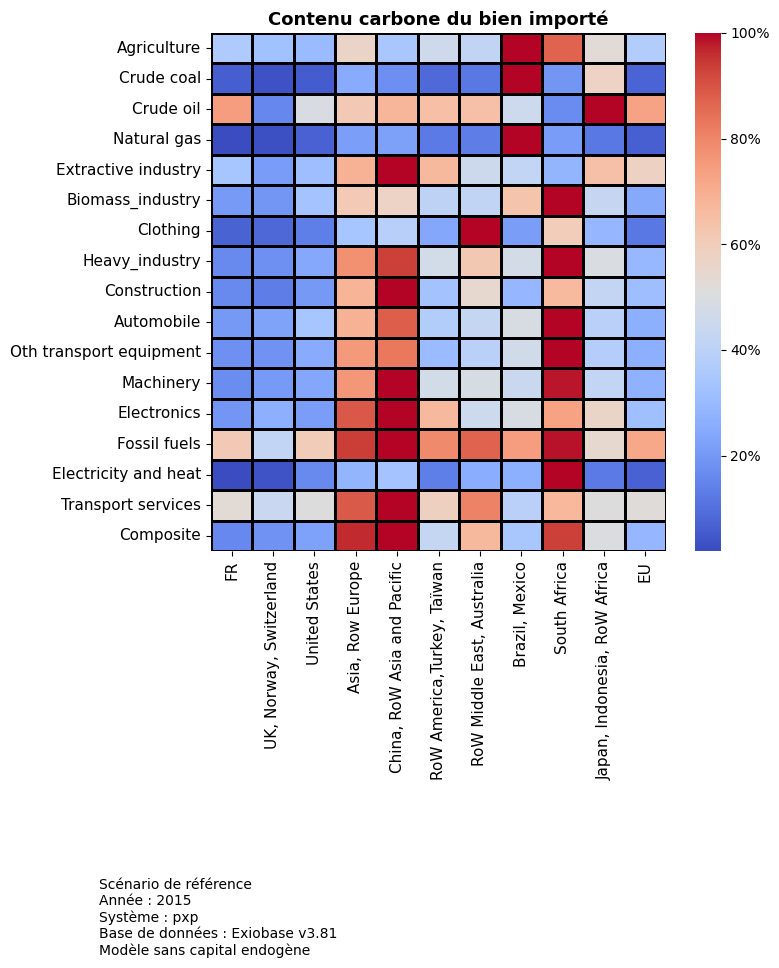

In [15]:
reference.ghg_content_heatmap()

Pour les deux méthodes précédentes, il est possible de saisir le nom d'un scénario en argument pour tracer la figure associée (sans argument, la figure se réfère à la référence).

Pour `ghg_content_heatmap`, il est possible d'afficher les données relatives à la production (`prod=True`) ou aux imports (`prod=False`) d'une région.

Les méthodes `plot_trade_synthesis`, `plot_co2eq_synthesis` et `plot_ghg_synthesis` tracent chacune plusieurs graphiques permettant d'avoir une vision globale des différences entre un scénario donné et la référence concernant le commerce, les gaz à effets de serres en équivalent carbone, ou bien les gaz à effets de serre pris séparément.

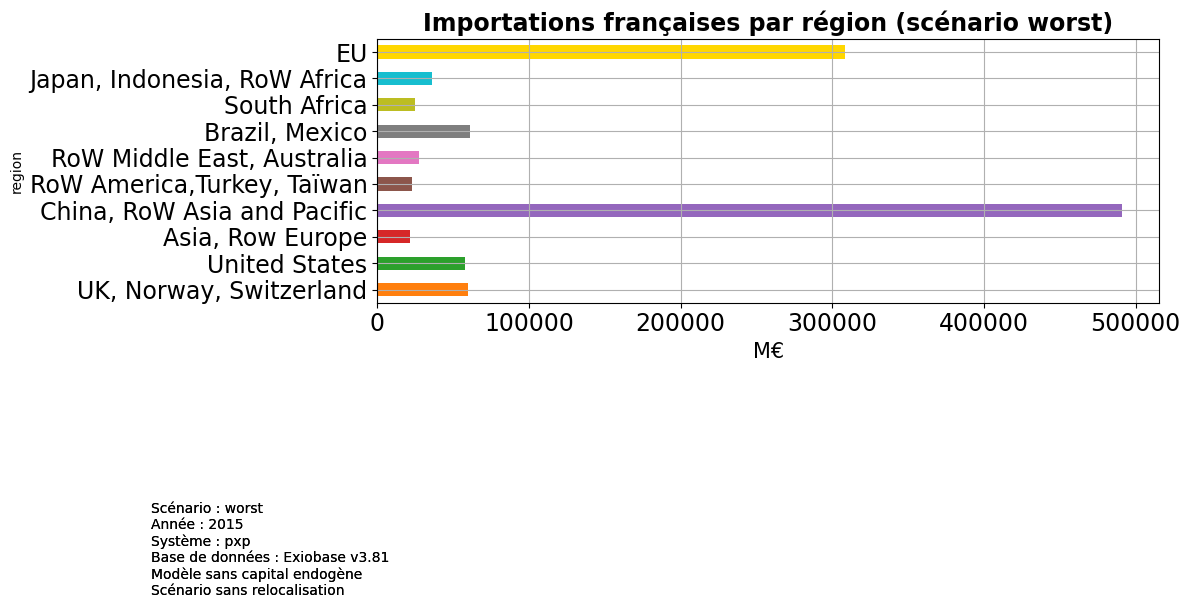

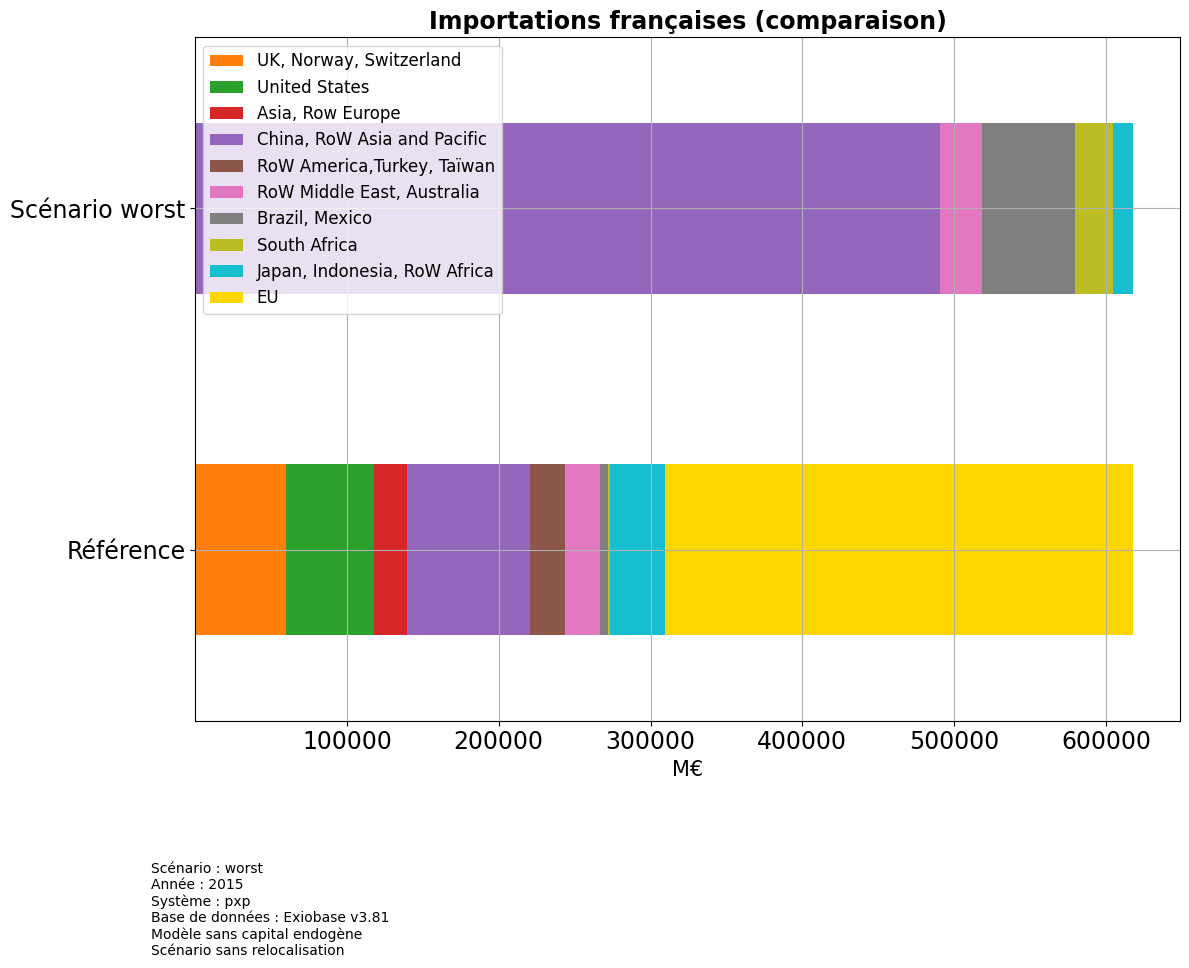

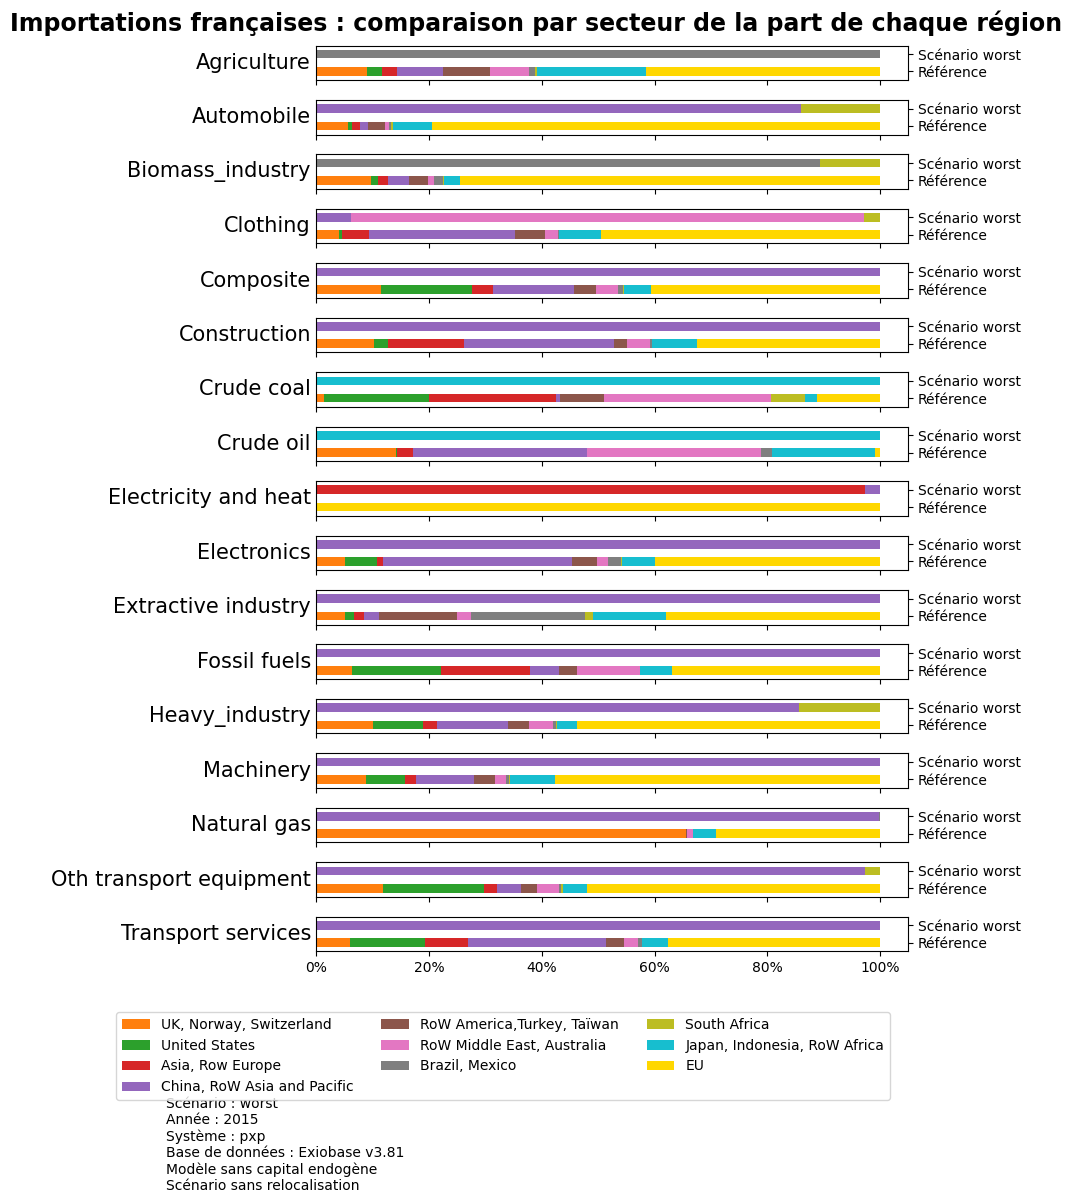

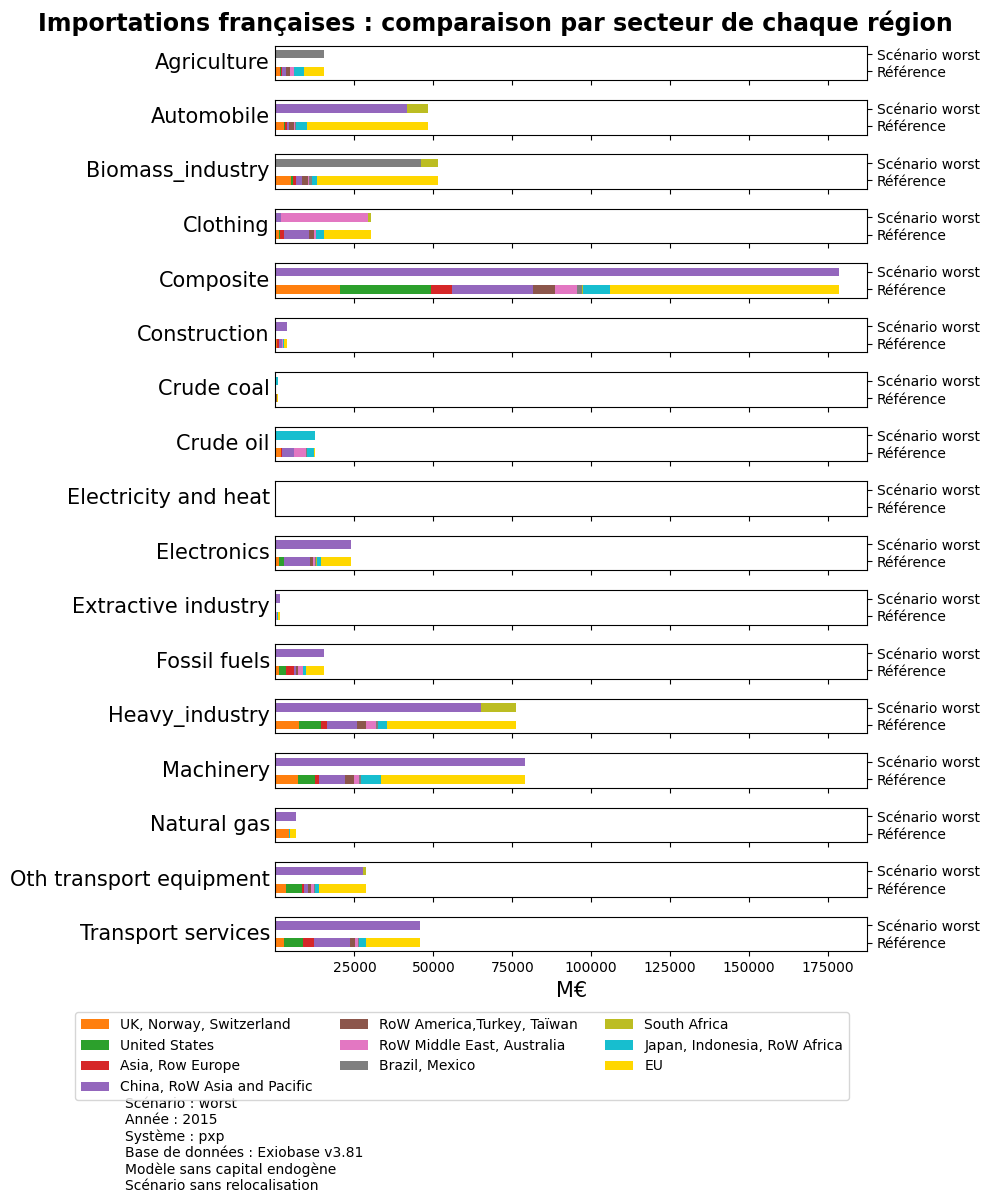

In [16]:
reference.plot_trade_synthesis("worst")

Pour appeler une méthode sur l'ensemble des scénarios chargés dans l'objet `Model`, il suffit de suffixer la méthode par `_all`.

Toutes les figures créées sont à la fois affichées et enregistrées dans le dossier `figures`, au sein d'une arborescence bien structurée.

## Améliorer la lisibilité des figures

Pour améliorer la lisibilité des figures, il est possible d'agréger les régions entre elles et/ou les secteurs entre eux. Pour cela, il suffit de renseigner les attributs `regions_mapper` et/ou `sectors_mapper` dans l'objet `Model`. Il est attendu des dictionnaire d'appariement similaires aux exemples `REGIONS_AGG` et `SECTORS_AGG` fournis dans le fichier `settings.py`. Pour enlever cette aggrégation, il suffit d'affecter la valeur `None` aux attributs `regions_mapper` et/ou `sectors_mapper`. (_Remarque :_ plusieurs attributs de l'objet `Model` sont automatiquement modifié lorsque `regions_mapper` ou `sectors_mapper` sont modifiés par l'utilisateur, l'utilisateur n'a pas à s'en occuper).

In [17]:
from main import REGIONS_AGG

reference.regions_mapper = REGIONS_AGG

Il est alors possible de générer des figures qui tiendront compte de cette aggrégation. **Attention :** ces nouvelles figures écraseront les éventuelles figures créées précédemment avec les mêmes paramètres mais une aggrégation différente (point à améliorer éventuellement par la suite).

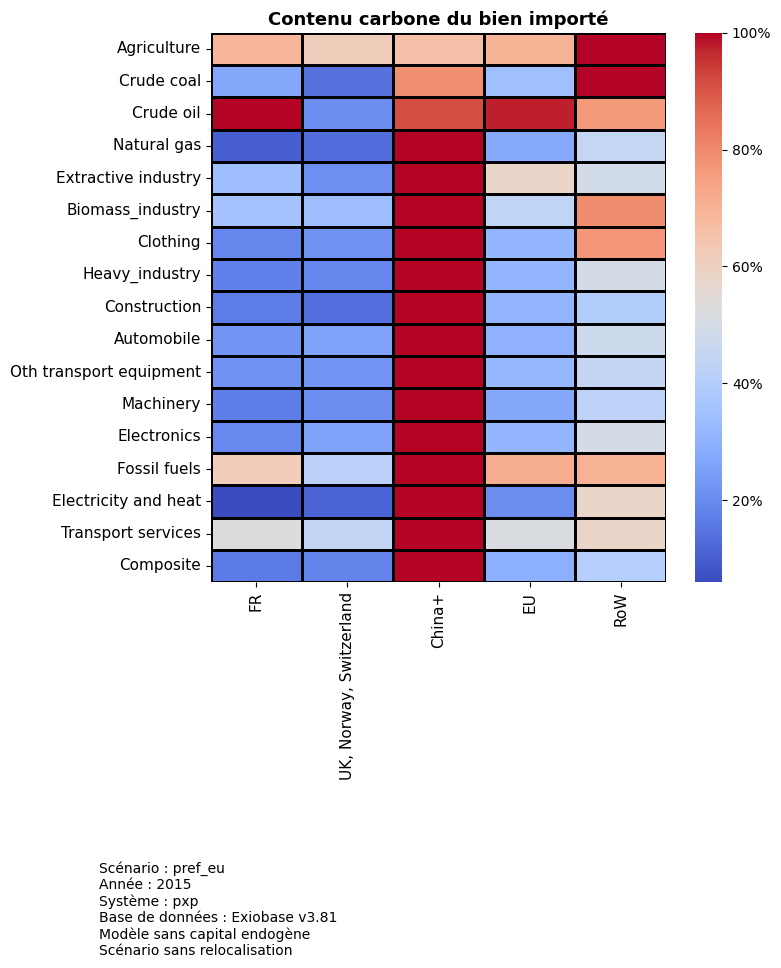

In [18]:
reference.ghg_content_heatmap("pref_eu")

# Endogénéisation de la consommation de capital

Pour endogénéiser la consommation de capital par les différents secteurs, il suffit d'ajouter `capital=True` lors de la création d'un nouveau modèle. Le programme télécharge alors la base de données de consommation de capital en ligne et crée le modèle associé.

In [19]:
reference = Model(base_year=2015, system="pxp", aggregation_name="opti_S", capital=True)

On peut alors utiliser le modèle exactement comme précédemment.

La fonction `endogenous_capital_comparison` du fichier `main.py` permet de comparer les composantes de l'empreinte carbone d'une région au cours des années, avec ou sans endogénéisation du capital. Attention, si les modèles n'ont jamais été chargés, elle peut prendre du temps (compter 10 minutes par année). Sinon, elle ne prend que quelques secondes.
À la différence des autres fonctions d'édition de figures, cette fonction renvoie un dictionnaire contenant les modèles chargés, pour les traiter plus facilement par la suite.


--- PROCESSING YEAR 2008 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2009 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2010 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2011 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2012 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2013 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2014 ---
--> With capital
--> Without capital

--- PROCESSING YEAR 2015 ---
--> With capital
--> Without capital


{'2008__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d16a6c8e0>,
 '2008__pxp__opti_S': <src.model.Model at 0x7f6d17003ee0>,
 '2009__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d16feb9a0>,
 '2009__pxp__opti_S': <src.model.Model at 0x7f6d16a92dc0>,
 '2010__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d16a6ccd0>,
 '2010__pxp__opti_S': <src.model.Model at 0x7f6d17145220>,
 '2011__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d17059d60>,
 '2011__pxp__opti_S': <src.model.Model at 0x7f6d164373d0>,
 '2012__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d16921580>,
 '2012__pxp__opti_S': <src.model.Model at 0x7f6d1707bc10>,
 '2013__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d16d15490>,
 '2013__pxp__opti_S': <src.model.Model at 0x7f6d142af520>,
 '2014__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d16ea61c0>,
 '2014__pxp__opti_S': <src.model.Model at 0x7f6d14198d00>,
 '2015__pxp__opti_S__with_capital': <src.model.Model at 0x7f6d141eeac0>,
 '2

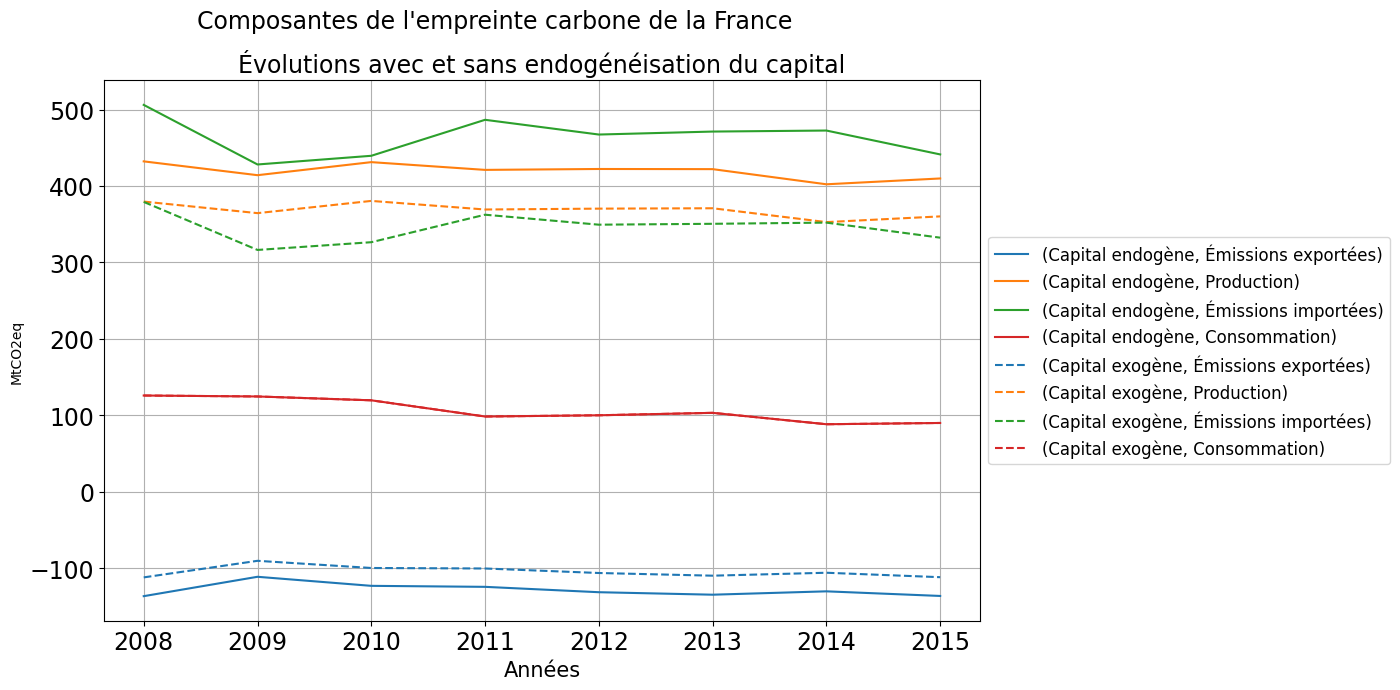

In [20]:
from main import endogenous_capital_comparison

endogenous_capital_comparison(start_year=2008, end_year=2015)